## Import Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Data Loading and Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

print(data.head())  # Correct variable used

# Preprocessing the text data (convert 'sentiment' to binary)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})  # Convert labels to binary (1, 0)
print(data.head())  # Confirm 'sentiment' is mapped to 0 and 1

# Define reviews and labels from the DataFrame
reviews = data['review'].values
labels = data['sentiment'].values

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Tokenize the text data
vocab_size = 5000
max_len = 300
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

# Convert text to sequences and pad them
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)
x_train_padded = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_test_padded = pad_sequences(x_test_seq, maxlen=max_len, padding='post')


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


## Define and Build the RNN Model

In [3]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [4]:
history = model.fit(
    x_train_padded, y_train,
    validation_data=(x_test_padded, y_test),
    epochs=10,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.6504 - loss: 0.5937 - val_accuracy: 0.8639 - val_loss: 0.3271
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8779 - loss: 0.3101 - val_accuracy: 0.8797 - val_loss: 0.3104
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8902 - loss: 0.2813 - val_accuracy: 0.8618 - val_loss: 0.3350
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9146 - loss: 0.2283 - val_accuracy: 0.8899 - val_loss: 0.3126


## Evaluate the model

In [5]:
test_loss, test_accuracy = model.evaluate(x_test_padded, y_test, verbose=1)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

val_accuracy = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]
print(f"Final Validation Accuracy: {val_accuracy:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8783 - loss: 0.3154

Test Accuracy: 0.8797
Final Validation Accuracy: 0.8899
Final Validation Loss: 0.3126


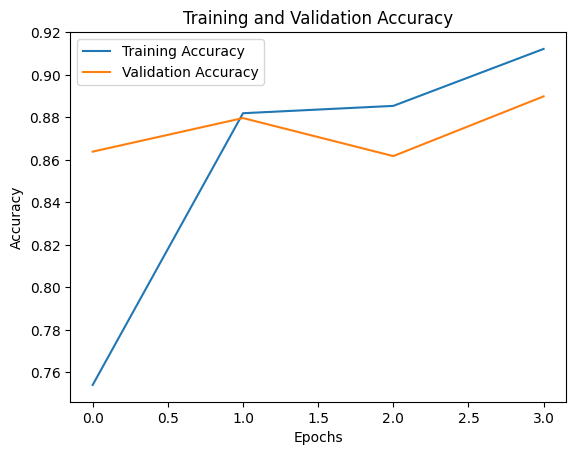

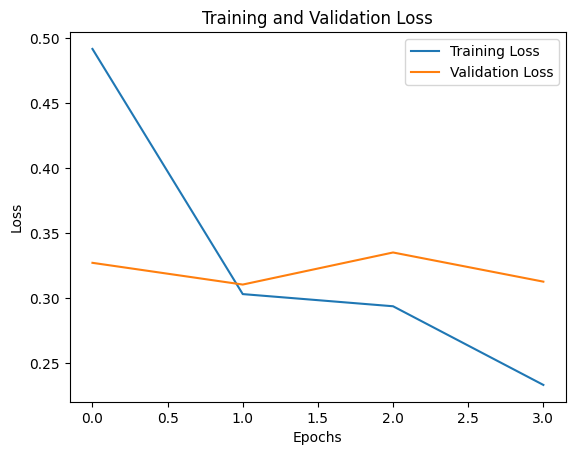

In [6]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [7]:
# Test Case Code - Predict Sentiment for a Custom Review
word_index = tokenizer.word_index
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

# Choose a sample review from x_test and process it
sample_index = 10
sample_review_text = x_test[sample_index]

# Tokenize and pad the sample review (it needs to match model input shape)
sample_review_seq = tokenizer.texts_to_sequences([sample_review_text])  # Tokenize the sample review
sample_review_padded = pad_sequences(sample_review_seq, maxlen=max_len, padding='post')  # Pad the sequence

# Make prediction
predicted_sentiment = model.predict(sample_review_padded)[0][0]
decoded_review = decode_review(sample_review_seq[0])  # Decode the tokenized review

# Display the decoded review and predicted sentiment
print(f"Review (decoded): {decoded_review}")
print(f"Predicted Sentiment Score: {predicted_sentiment:.4f}")
if predicted_sentiment > 0.5:
    print("Sentiment: Positive")
else:
    print("Sentiment: Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Review (decoded): <OOV> this was immensely boring the leading man christian <OOV> has got to be the worst actor i have ever seen and another thing if the character in the movie moved to america when he was ten or something and had been living here for over 20 years he would speak a lot better english than what he pulls of here or to say it in my own language <OOV> <OOV> but it is cool to see <OOV> <OOV> in a movie made in hollywood it was just a damn shame they were <OOV> <OOV> the storyline itself is below mediocre i have a <OOV> that christian <OOV> did this movie just to live the dream as he clearly does in the film by <OOV> one beautiful <OOV> after another
Predicted Sentiment Score: 0.0106
Sentiment: Negative


In [8]:
# Save the trained model
model.save('imdb_rnn_model.h5')